# Assignment 5

Implement K-Nearest Neighbors, decision tree, Naive Bays, SVM , random forest  Adaboost ,gradient boosting classification algorithm on diabetes type 1 and type 2. Compute confusion matrix, accuracy, error rate, f 1 Score, ROC curve, precision and recall on the given dataset.

write theory of all classification algorithm .

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[]

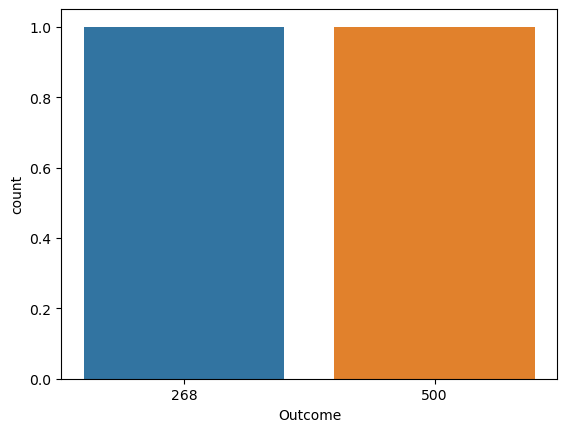

In [19]:
sns.countplot(x=df['Outcome'].value_counts())
plt.plot()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=54)

In [25]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
18,1,103,30,38,83,43.3,0.183,33
467,0,97,64,36,100,36.8,0.600,25
87,2,100,68,25,71,38.5,0.324,26
659,3,80,82,31,70,34.2,1.292,27
208,1,96,64,27,87,33.2,0.289,21


In [23]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train.values,y_train)
y_pred=dtc.predict(X_test.values)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_dtc = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[82 23]
 [27 22]]
Accuracy Score: 0.6753246753246753
Recall Score: 0.4489795918367347
F1 Score: 0.46808510638297873
Precision Score: 0.4888888888888889


In [21]:
# RandomForestClassifier?

In [10]:
rfc=RandomForestClassifier(n_estimators=100,random_state=150)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_rfc = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[94 11]
 [23 26]]
Accuracy Score: 0.7792207792207793
Recall Score: 0.5306122448979592
F1 Score: 0.6046511627906977
Precision Score: 0.7027027027027027


In [11]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred =svm.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_svc = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[95 10]
 [28 21]]
Accuracy Score: 0.7532467532467533
Recall Score: 0.42857142857142855
F1 Score: 0.525
Precision Score: 0.6774193548387096


In [22]:
# KNeighborsClassifier?

In [12]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_knn = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[94 11]
 [26 23]]
Accuracy Score: 0.7597402597402597
Recall Score: 0.46938775510204084
F1 Score: 0.5542168674698795
Precision Score: 0.6764705882352942


In [13]:
gbc=GradientBoostingClassifier(n_estimators=200)
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_gbc = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[89 16]
 [21 28]]
Accuracy Score: 0.7597402597402597
Recall Score: 0.5714285714285714
F1 Score: 0.6021505376344085
Precision Score: 0.6363636363636364


In [14]:
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
score_abc = accuracy_score(y_test,y_pred)
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision Score:",precision_score(y_test, y_pred))

Confusion Matrix
[[89 16]
 [23 26]]
Accuracy Score: 0.7467532467532467
Recall Score: 0.5306122448979592
F1 Score: 0.5714285714285714
Precision Score: 0.6190476190476191


# Result

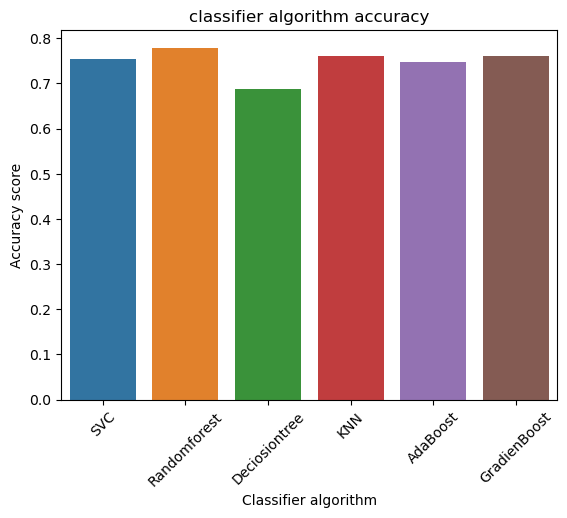

In [15]:
categorie = ["SVC","Randomforest","Deciosiontree","KNN","AdaBoost","GradienBoost"]
values = [score_svc,score_rfc,score_dtc,score_knn,score_abc,score_gbc]
sns.barplot(x = categorie,y=values)
plt.xlabel("Classifier algorithm")
plt.ylabel("Accuracy score")
plt.title("classifier algorithm accuracy")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: >

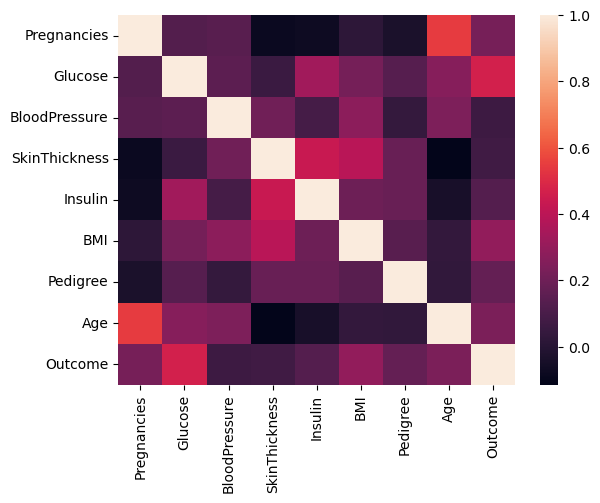

In [20]:
sns.heatmap(df.corr())